In [1]:
!pip install catboost
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'drive/MyDrive/Skripsi/india.csv')

In [4]:
#Dropping unnecessary columns
cols_to_drop = ['Station_Code', 'Locations', 'State', 'Temp', 'Year', 'BOD', 'FecalC', 'TotalC']
df = df.drop(cols_to_drop, axis=1)
df.head()

,DO,pH,EC,Nitrate,Class
0,6.7,7.5,203.0,0.1,4
1,5.7,7.2,189.0,0.2,4
2,6.3,6.9,179.0,0.1,4
3,5.8,6.9,64.0,0.5,4
4,5.8,7.3,83.0,0.4,4


In [5]:
#Seperating X & y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
#Splitting test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [7]:
#Applying data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Empty result dataframe
res = pd.DataFrame(index=['precision','recall','f1-score','accuracy'])

In [9]:
#Result Function
def result(clf, Classifier_Name):
  #Model Fitting
  clf.fit(X_train, y_train)
  
  #Showing performance result
  y_pred=clf.predict(X_test)
  from sklearn.metrics import classification_report
  clf_res = classification_report(y_test, y_pred, output_dict=True)

  #Append classifier result to result DataFrame
  res[str(Classifier_Name)] = [clf_res['weighted avg']['precision'],
                               clf_res['weighted avg']['recall'], 
                               clf_res['weighted avg']['f1-score'], 
                               clf_res['accuracy']]
  display(res)

  #Creating confusion matrix illustration
  from sklearn.metrics import ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, xticks_rotation="vertical", 
    display_labels=['Unsuitable', 'Very Poor', 'Poor', 'Good', 'Excellent'])
  disp.ax_.set_title("Confusion Matrix for " + str(Classifier_Name) + " Classifier")

,Decision Tree
precision,0.889977
recall,0.891304
f1-score,0.890223
accuracy,0.891304


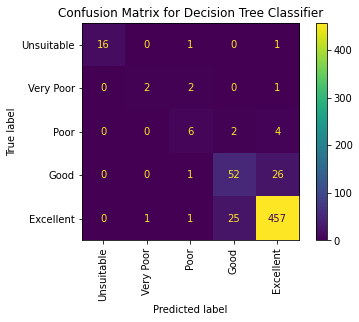

In [10]:
#Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
result(dt_clf, "Decision Tree")

,Decision Tree,Random Forest
precision,0.889977,0.905367
recall,0.891304,0.908027
f1-score,0.890223,0.903839
accuracy,0.891304,0.908027


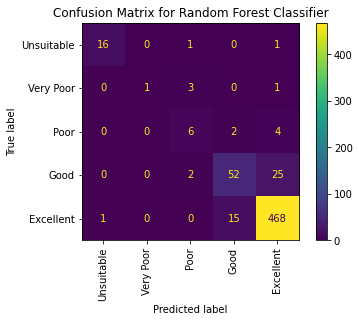

In [11]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
result(rf_clf, "Random Forest")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree,Random Forest,SVM
precision,0.889977,0.905367,0.803149
recall,0.891304,0.908027,0.829431
f1-score,0.890223,0.903839,0.769794
accuracy,0.891304,0.908027,0.829431


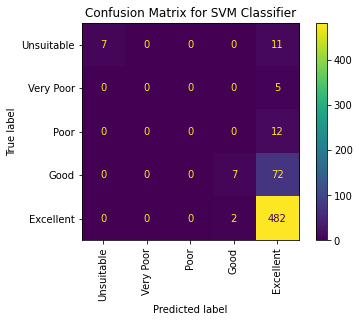

In [12]:
# Using Kernel SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf', random_state = 0)
result(svm_clf, "SVM")

,Decision Tree,Random Forest,SVM,Naive Bayes
precision,0.889977,0.905367,0.803149,0.782488
recall,0.891304,0.908027,0.829431,0.824415
f1-score,0.890223,0.903839,0.769794,0.789410
accuracy,0.891304,0.908027,0.829431,0.824415


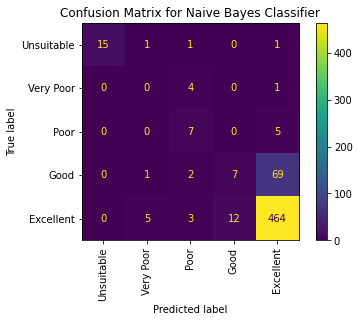

In [13]:
# Using Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
result(nb_clf, "Naive Bayes")

,Decision Tree,Random Forest,SVM,Naive Bayes,CatBoost
precision,0.889977,0.905367,0.803149,0.782488,0.917177
recall,0.891304,0.908027,0.829431,0.824415,0.923077
f1-score,0.890223,0.903839,0.769794,0.789410,0.917529
accuracy,0.891304,0.908027,0.829431,0.824415,0.923077


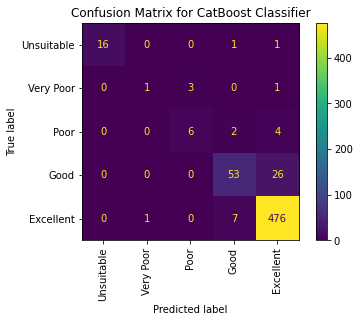

In [14]:
# Using CatBoost Classifier
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(random_seed=42, logging_level='Silent')
result(cb_clf, "CatBoost")